In [20]:
#Import bundle sampling and analysis functions
from dreimac import CircularCoords
import circle_bundles as cb
import synthetic as sy
#cb.attach_bundle_viz_methods()

from circle_bundles import RP2UnitVectorMetric as rp2_metric

import matplotlib.pyplot as plt

#For saving
import pickle
folder_path = '/Users/bradturow/Desktop/Diagrams/Paper Diagrams/'

# Generate Or Load A Dataset

## Generate From A Template 

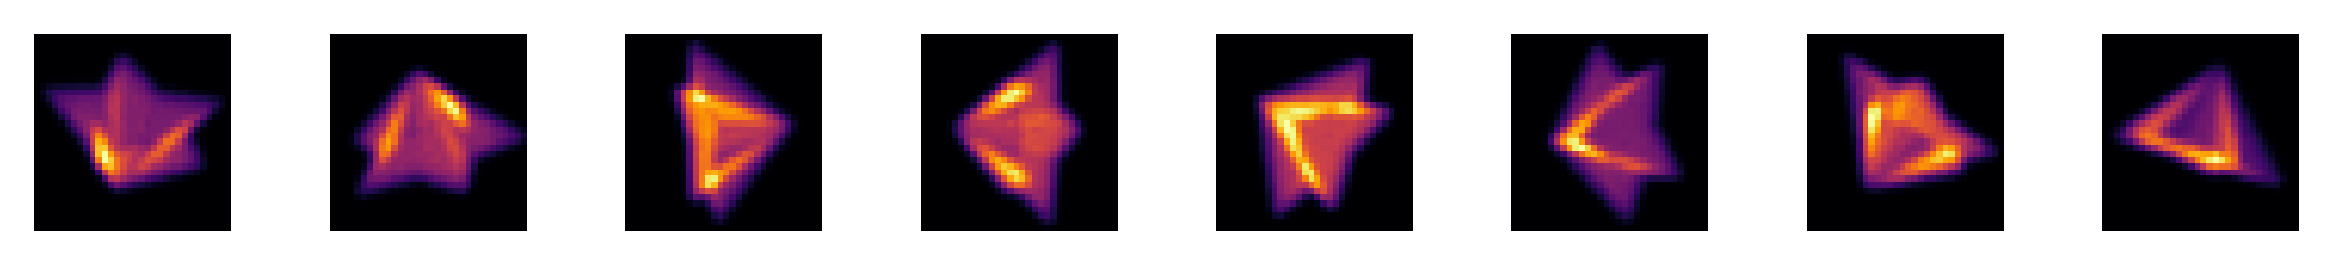

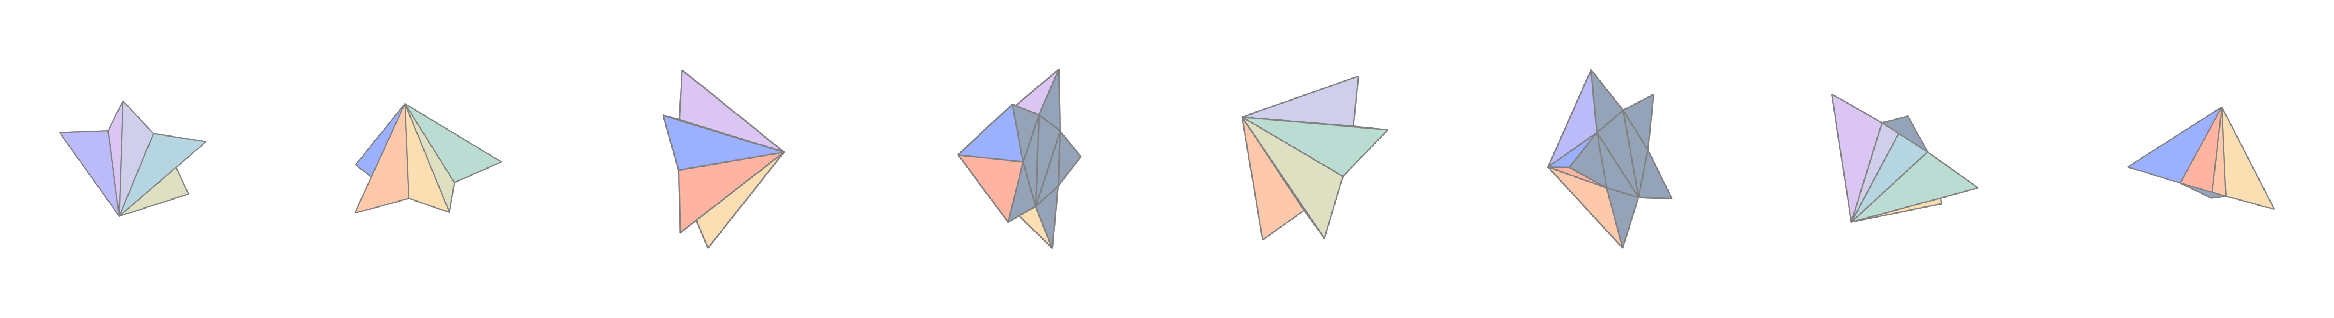

In [2]:

#Get a density
p = 5
height = 1
grid_size = 32

mesh = sy.make_star_pyramid(n_points = p, height = height)
density = sy.mesh_to_density(mesh, grid_size=grid_size, sigma=0.05)

vis_func = sy.make_density_visualizer(grid_size = grid_size)
mesh_vis = sy.make_star_pyramid_visualizer(mesh)

#View a visualization of the mesh
#SO3_data = np.array([np.eye(3).flatten()])
n_samples = 8
SO3_data = sy.sample_SO3(n_samples)[0]

file_name = 'star density sample.pdf'
save_path = folder_path + file_name
save_path = None
density_sample = sy.rotate_density(density, SO3_data, grid_size = grid_size)
fig = cb.show_data_vis(density_sample, vis_func, max_samples = n_samples, n_cols = n_samples, save_path = save_path, sampling_method = 'first')
plt.show()

file_name = 'star mesh sample.pdf'
save_path = folder_path + file_name
save_path = None
mesh_sample = sy.get_mesh_sample(mesh, SO3_data)
fig = cb.show_data_vis(mesh_sample, mesh_vis, max_samples = n_samples, n_cols = n_samples, save_path = save_path, pad_frac = 0.3, sampling_method = 'first')
plt.show()


In [3]:
#About 60 seconds

#Generate a dataset of random rotations
n_samples = 10000
SO3_data = sy.sample_SO3(n_samples)[0]
#projs = project_O3(SO3_data)

data = sy.rotate_density(density, SO3_data, grid_size = grid_size)

#Create the corresponding triangle meshes for visualization
mesh_data = sy.get_mesh_sample(mesh, SO3_data)

print(f'{n_samples} triangle meshes and 3D densities generated.')

10000 triangle meshes and 3D densities generated.


In [ ]:
import pickle
import os
save_path = '/Users/bradturow/Desktop/Circle Bundle Code/star_pyramid_data.pkl'

data_dict = {'density data': data, 
             'mesh data': mesh_data, 
             'rp2 projections': base_points,
            'trimesh object': mesh,
            'density grid size': grid_size
            }

with open(save_path, 'wb') as f:
    pickle.dump(data_dict, f)

# Get and print the file size
size_bytes = os.path.getsize(save_path)
size_mb = size_bytes / (1024 * 1024)
print(f"Saved to '{save_path}' ({size_mb:.2f} MB)")


## Load A Dataset

In [ ]:
import pickle
import synthetic as sy

save_path = '/Users/bradturow/Desktop/Circle Bundle Code/star_pyramid_data.pkl'
with open(save_path, 'rb') as f:
    data_dict = pickle.load(f)


n_samples = 5000  

data = data_dict['density data'][:n_samples]
mesh_data = data_dict['mesh data'][:n_samples]
base_points = data_dict['rp2 projections'][:n_samples]

#For visualization
grid_size = data_dict['density grid size']
mesh = data_dict['trimesh object']
vis_func = sy.make_density_visualizer(grid_size = grid_size)
mesh_vis = sy.make_star_prism_visualizer(mesh)

print(f'Loaded {n_samples} rotated prisms and corresponding 3D densities.')

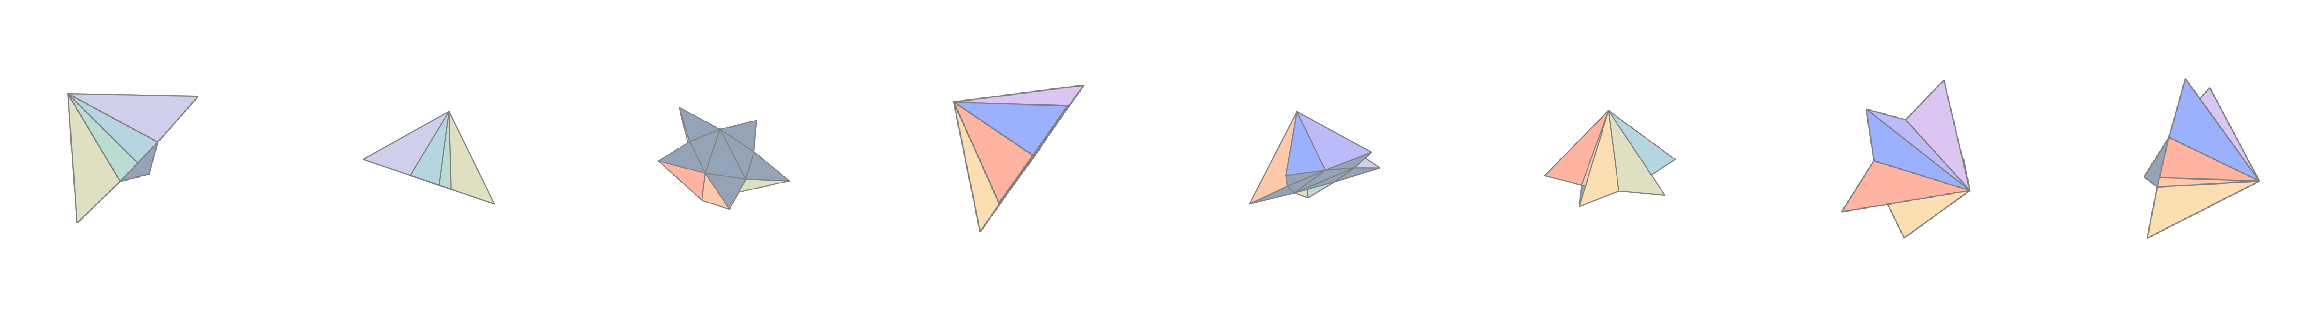

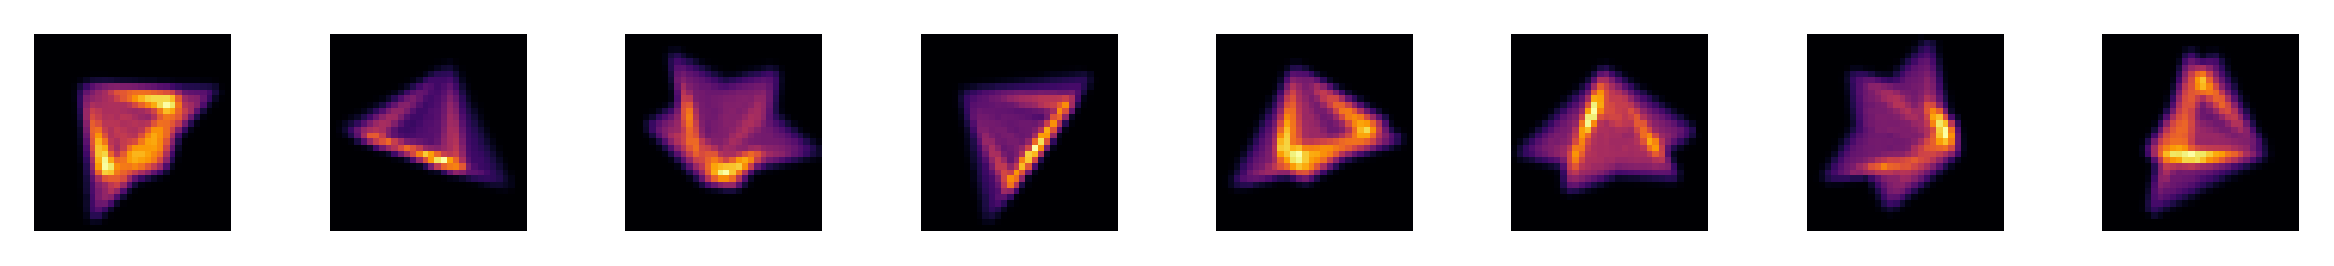

In [4]:
#Show some samples
n_samples = 8
save_path = None

inds = np.random.choice(len(data), n_samples)
fig = cb.show_data_vis(mesh_data[inds], mesh_vis, max_samples = n_samples, n_cols = n_samples, save_path = save_path, sampling_method = 'first', pad_frac = 0.4)
plt.show()

fig = cb.show_data_vis(data[inds], vis_func, max_samples = n_samples, n_cols = n_samples, save_path = save_path, sampling_method = 'first')
plt.show()



# Preliminary Analysis

In [ ]:
#Compute base projections
base_points = sy.get_density_axes(data)


In [ ]:
#Show a PCA visualization of the dataset
cb.show_pca(data)

In [ ]:
#Show an interactive visualization of the projection mapping
app = cb.show_bundle_vis(base_points = base_points, 
                         data  = data, 
                         base_metric = rp2_metric(), max_samples = 5000)


In [ ]:
#Run Ripser on a sample of the data
from ripser import ripser
from persim import plot_diagrams


# Run Ripser
dgms_2 = ripser(data, coeff=2, maxdim=2, n_perm=500)["dgms"]
dgms_3 = ripser(data, coeff=3, maxdim=2, n_perm=500)["dgms"]

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

plot_diagrams(dgms_2, ax=axes[0], title="coeff = 2")
plot_diagrams(dgms_3, ax=axes[1], title="coeff = 3")

plt.tight_layout()
plt.show()


# Bundle Analysis

## Base Projections And Cover 

### Cover And Nerve Summary
- $n_\text{sets} = 73$, $n_\text{samples} = 10000$

**Recorded Simplex Counts:**

- $\#(\text{0-simplices}) = 73$
- $\#(\text{1-simplices}) = 216$
- $\#(\text{2-simplices}) = 144$
- *No recorded simplices in dimensions* $\ge 3$

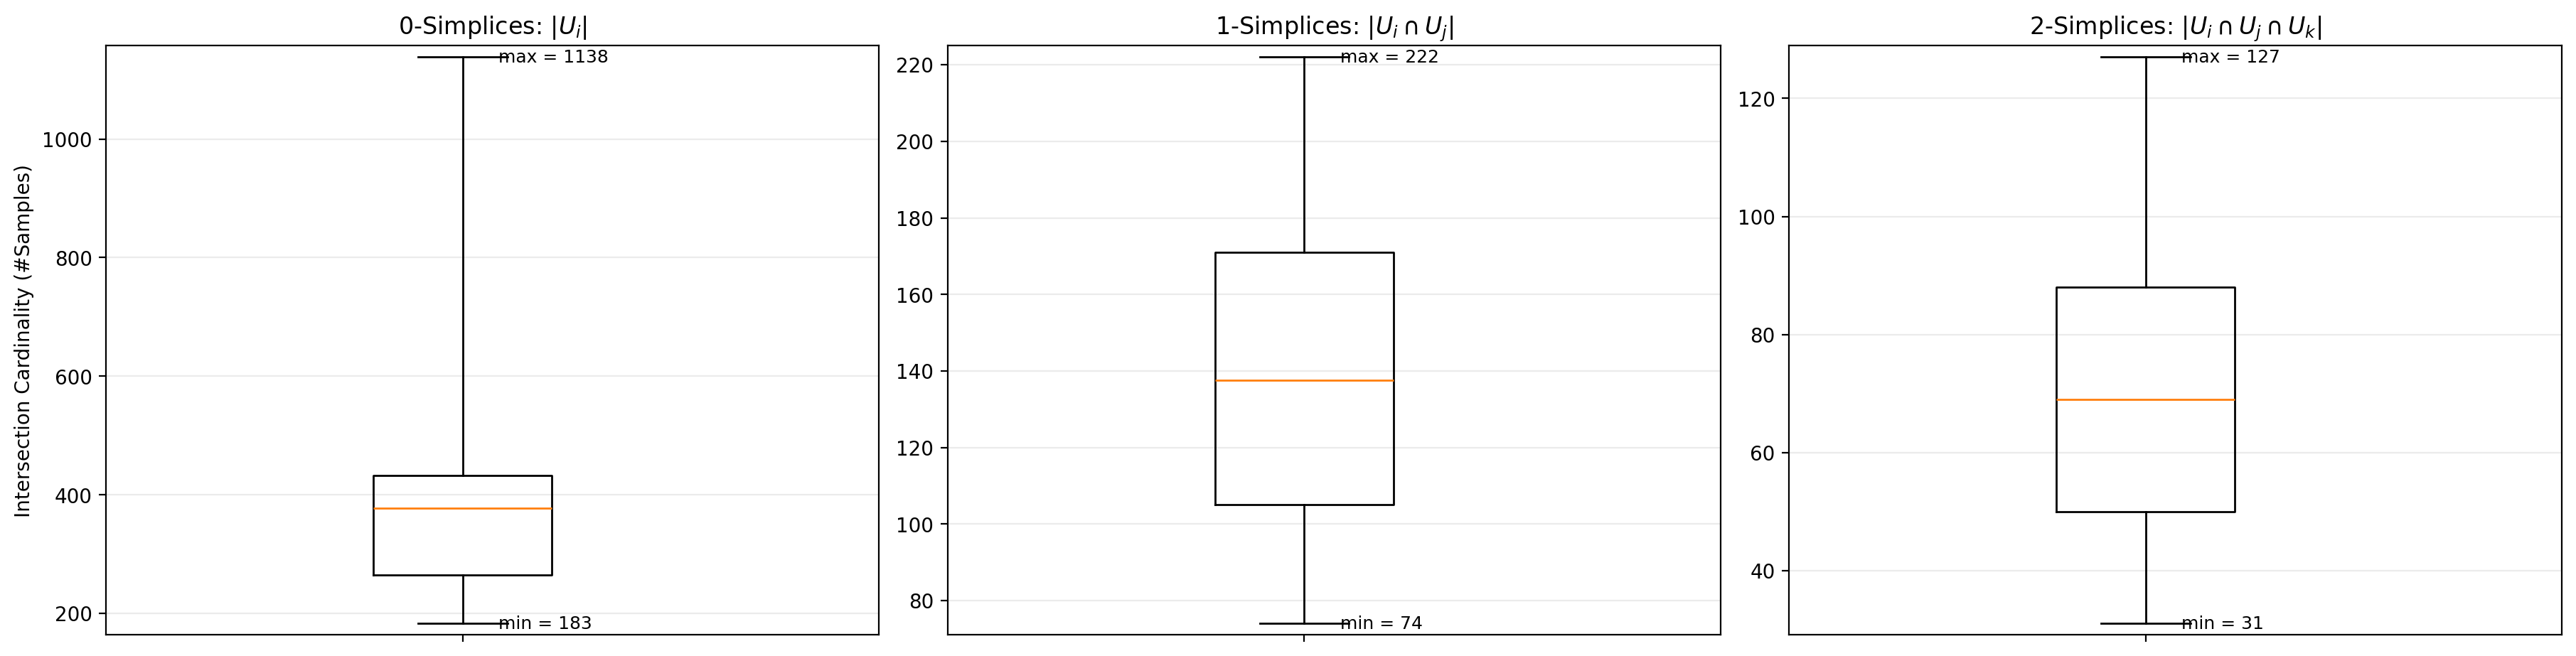

In [5]:
#Construct an open cover of RP2
n_sd = 2
rp2_cover = cb.make_rp2_cover(base_points, n_sd = n_sd)

summ = rp2_cover.summarize(plot = True)

In [6]:
#Show a visualization of a 'fat fiber' of the projection map
import matplotlib.pyplot as plt

center_ind = 579
r = 0.2
dist_mat = rp2_metric().pairwise(X=base_points)
nearby_indices = np.where(dist_mat[center_ind] < r)[0]

fiber_data = data[nearby_indices]
vis_data = mesh_data[nearby_indices]


fig = plt.figure(figsize=(18, 6), dpi=120)
ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax2 = fig.add_subplot(1, 3, 2, projection="3d")
ax3 = fig.add_subplot(1, 3, 3, projection="3d")

# PCA labeled with meshes
cb.fiber_vis(
    fiber_data,
    mesh_vis,
    vis_data=vis_data,
    max_images=500,
    zoom=0.08,
    ax=ax1,
    show=False,
)
ax1.set_title("Fiber PCA (Meshes)")

# PCA labeled with density projections
cb.fiber_vis(
    fiber_data,
    vis_func=vis_func,
    max_images=500,
    zoom=0.05,
    ax=ax2,
    show=False,
)
ax2.set_title("Fiber PCA (Densities)")

# Base visualization
cb.base_vis(
    base_points,
    center_ind,
    r,
    dist_mat,
    use_pca=False,
    ax=ax3,
    show=False,
)
ax3.set_title("Base neighborhood")

plt.tight_layout()
plt.show()


Bundle viewer running at: http://127.0.0.1:60739/


## Fiberwise Clustering 

/Users/bradturow/anaconda3/envs/tda_env/lib/python3.10/site-packages/ripser/ripser.py:253: UserWarning:

The input point cloud has more columns than rows; did you mean to transpose?

/Users/bradturow/anaconda3/envs/tda_env/lib/python3.10/site-packages/ripser/ripser.py:253: UserWarning:

The input point cloud has more columns than rows; did you mean to transpose?

/Users/bradturow/anaconda3/envs/tda_env/lib/python3.10/site-packages/ripser/ripser.py:253: UserWarning:

The input point cloud has more columns than rows; did you mean to transpose?



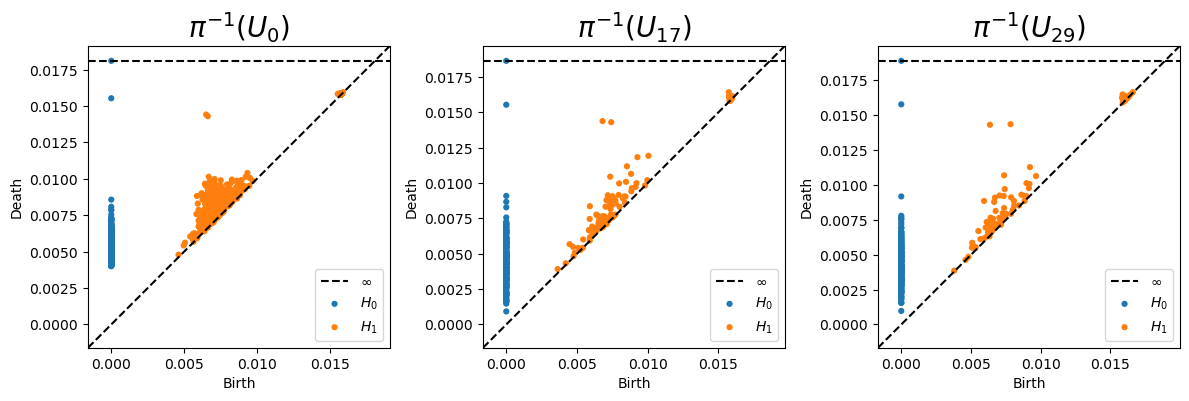

In [8]:
#Run persistence on fibers to get an epsilon value for fiberwise clustering
fiber_ids, dense_idx_list, rips_list = cb.get_local_rips(
    data,
    cover.U,
    p_values=None,
    to_view = [0,17,29],
    maxdim=1,
    n_perm=500,
    random_state=None,
)

fig, axes = cb.plot_local_rips(
    fiber_ids,
    rips_list,
    n_cols=3,
    titles='default',
    font_size=20,
    save_path=None,
)

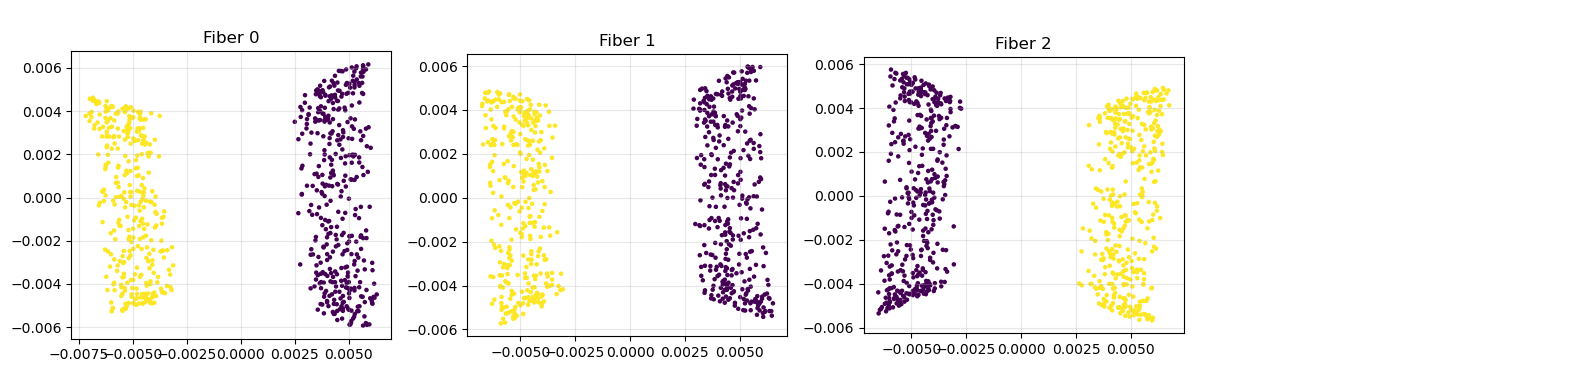

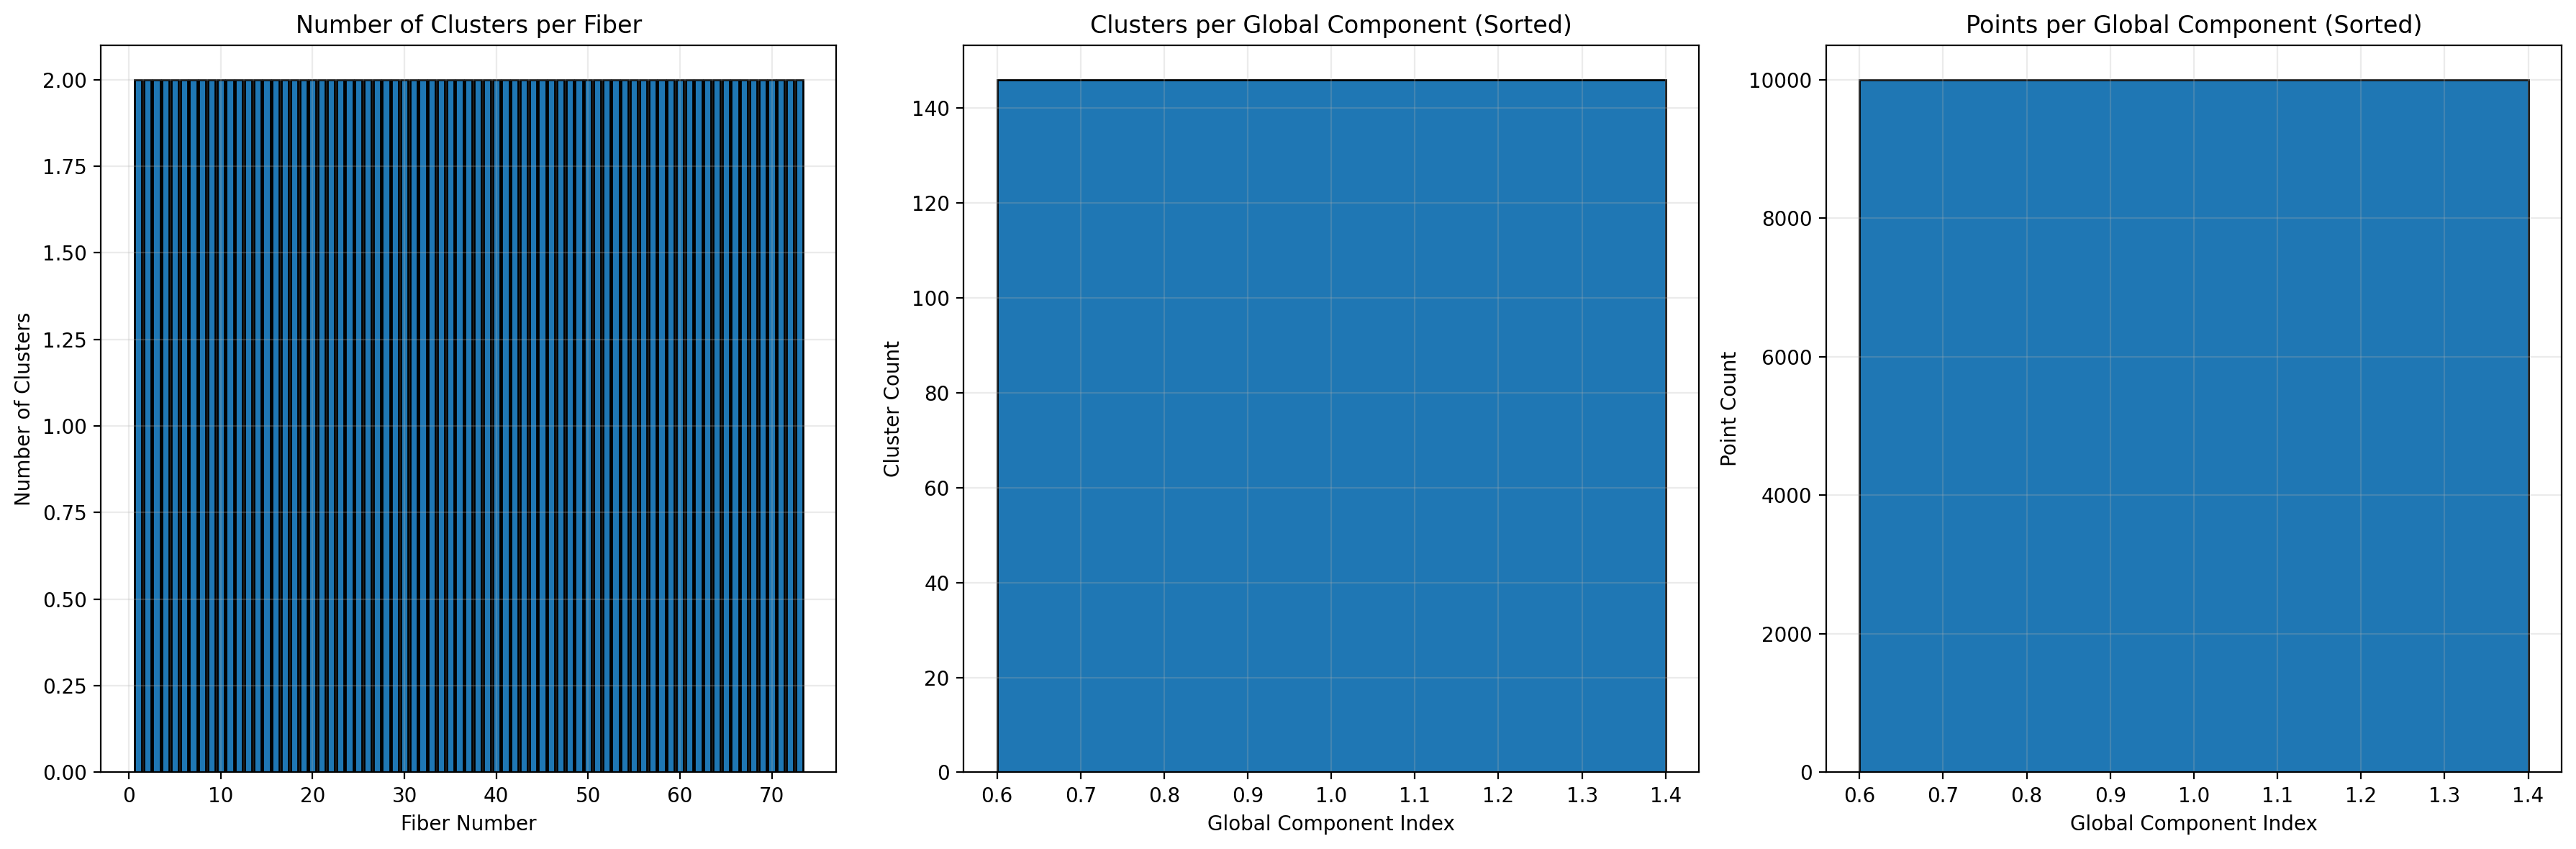

In [9]:
#About 60 seconds

#Run fiberwise clustering to separate each fiber into two components

eps_values = 0.0125*np.ones(len(cover.U))
min_sample_values = 5*np.ones(len(cover.U))

components, G, graph_dict, cl, summary = cb.fiberwise_clustering(data, 
                                                              cover.U, 
                                                              eps_values, 
                                                              min_sample_values)

save_path = None
to_view = [0,1,2]
fig,ax = cb.plot_fiberwise_pca_grid(summary, to_view = to_view, save_path=save_path)
plt.show()
fig, ax = cb.plot_fiberwise_summary_bars(summary, hide_biggest=False, save_path=save_path)
plt.show()

In [11]:
#Confirm that the Sigma_2 monodromy is non-trivial (i.e., the whole dataset is one connected component)
signs = cb.get_cocycle_dict(G)

is_a_coboundary = cb.solve_Z2_edge_coboundary(cover.nerve_edges(), signs, len(cover.U))[0]

print(f'Is a coboundary: {is_a_coboundary}')

Is a coboundary: False


## Cluster Visualization 

In [ ]:
#Show the 1-skeleton of the nerve of the cover labeled by the permutation cocycle
signs_O1 = {edge:(-1) ** signs[edge] for edge in signs.keys()}

#Get vertices and sample data to use for the visualization of the nerve
sample_inds = []
vertex_coords = np.array([vertex for simplex,vertex in cover.vc_rp2_r3.items()])
vertex_coords = vertex_coords/np.linalg.norm(vertex_coords, axis = 1).reshape(-1,1)
dist_mat = get_dist_mat(cover.landmarks, data2 = cover.base_points, metric = RP2_dist)
print('distance matrix computed.')

In [ ]:
#Show the 1-skeleton of the nerve of the cover labeled by the permutation cocycle
node_labels = [f"{i+1}" for i in range(cover.flat_vertex_coords.shape[0])]

file_name = 'Full G Visualization.pdf'
save_path = folder_path + file_name
save_path = None

fig, axes = nerve_vis(
    cover.K,
    cover.flat_vertex_coords,
    cochains={1:signs_O1},
    base_colors={0:'black', 1:'black', 2:'pink'},
    cochain_cmaps={1:{1: 'blue', -1:'darkred'}},
    opacity=0,
    node_size=18,
    line_width=2,
    node_labels=node_labels,
    fontsize=9,
    font_color='lavender',
    vis_func=mesh_vis,
    data=None,
    image_zoom=0.1,
    save_path=save_path,
    title=None
)

plt.show()

In [ ]:
#View a visualization of G
import gudhi as gd
from circle_bundles.nerve_utils import *

#Convert G to a simplex tree object for visualization
node_list = list(G.nodes)
node_map = {node: i for i, node in enumerate(node_list)}
G_st = gd.SimplexTree()
G_vertex_coords = []

for (j, k) in G.nodes():
    vec = np.append(cover.flat_vertex_coords[j], k)
    G_vertex_coords.append(vec)
G_vertex_coords = np.array(G_vertex_coords)

for node, i in node_map.items():
    G_st.insert([i])

for u, v in G.edges:
    u_int = node_map[u]
    v_int = node_map[v]
    G_st.insert([u_int, v_int])

edges = get_simplices(G_st,1)
nu = {}
for simplex, _ in G_st.get_simplices():
    if len(simplex) == 2:  # 1-simplex (edge)
        i, j = sorted(simplex)
        same_parity = (i % 2) == (j % 2)
        nu[(i, j)] = 1 if same_parity else -1

label_dict = {}
for n in range(len(get_simplices(G_st,0))):
    k = n // 2
    i = n % 2
    sign = '-' if i == 0 else '+'
    label_dict[n] = f"${k+1}^{{{sign}}}$"

edge_width_map = {key: 3.0 if val == 1 else 1.0 for key, val in nu.items()}

fig = nerve_vis_adv(G_vertex_coords, edges, mesh_vis, vis_data=None,
                          cochains={1:nu}, cochain_cmaps={1:{1: 'blue', -1:'darkred'}},
                          zoom=0.09, figsize=(10, 8), node_size=24, line_width = 2, node_labels = label_dict, label_color = 'white', edge_width_map = edge_width_map)


file_name = 'Star 3D G Visualization1.pdf'
save_path = folder_path + file_name
save_path = None
if save_path is not None:
    fig.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#Show the nodes of G labeled with a + or -
g = 1  #Get clusters labeled 0 or 1
sample_inds = []

#Choose a representative for each cluster
for node in G.nodes():
    (j,k) = node
    if k == g:
        node_inds = cl[j] == k
        min_idx_local = np.argmin(dist_mat[j, node_inds])
        min_index = np.where(node_inds)[0][min_idx_local]
        sample_inds.append(min_index)

sample_data = data[sample_inds]
sample_mesh_data = mesh_data[sample_inds]


node_labels = [f"{i+1}" for i in range(cover.flat_vertex_coords.shape[0])]
file_name = 'Star Densities Nerve 1 Clusters.pdf'
save_path = folder_path + file_name
save_path = None

fig, axes = nerve_vis(
    cover.K,
    cover.flat_vertex_coords,
    cochains={1:signs_O1},
    base_colors={0:'black', 1:'black', 2:'pink'},
    cochain_cmaps={1:{1: 'blue', -1:'lightgray'}},
    opacity=0,
    node_size=24,
    line_width=1,
    node_labels=None,
    fontsize=8,
    font_color='white',
    vis_func=mesh_vis,
    data=sample_mesh_data,
    image_zoom=0.085,
    save_path=save_path,
    title=None
)
plt.show()



## Lift To A Bundle Over $\mathbb{S}^{2}$ 

In [13]:
#Construct a lift of the base map from RP2 to S2
lifted_base_points = cb.lift_base_points(G, cl, base_points)

n_sd = 2
s2_cover = cb.make_s2_cover(lifted_base_points, n_sd = n_sd)
print('Cover constructed.')

Cover constructed.


0 200
Cumulative Explained Variance:
  k=1: 0.1598
  k=2: 0.3008
  k=3: 0.4153


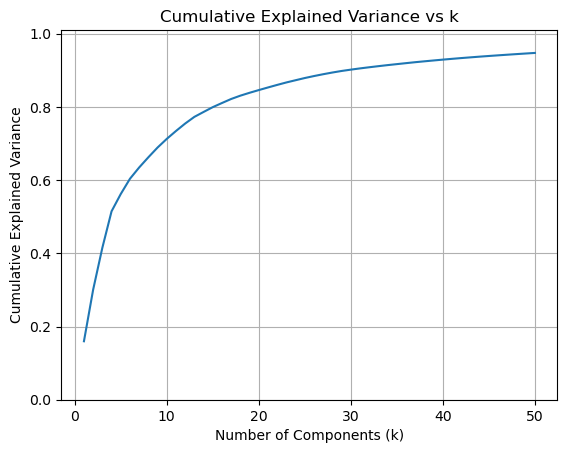

In [16]:
#Try running circular coordinates on a single open set
j= 4
n_landmarks = 200
prime = 43
fiber_data = data[s2_cover.U[j]]
fiber_meshes = mesh_data[s2_cover.U[j]]
patch_angles, n_warnings, n_lmks = cb.compute_circular_coords_dreimac(fiber_data, 
                                                                      n_landmarks_init = n_landmarks, 
                                                                      CircularCoords_cls = CircularCoords)

print(n_warnings, n_lmks)
cb.show_pca(fiber_data, colors = patch_angles)



In [17]:
#Compute local trivializations and characteristic classes (about 90 sec)
s2_bundle = cb.build_bundle(
    data,
    s2_cover,
    CircularCoords_cls=CircularCoords,  
    landmarks_per_patch = 500,
    show=True
)


<IPython.core.display.Math object>

In [ ]:
import os
import pickle
U = s2_cover.U
pou = s2_cover.pou
f = s2_bundle.local_triv.f
Omega = s2_bundle.classes.cocycle_used.Omega


bundle_artifact = {'data':s2_bundle.data, 
                   'base_points':s2_cover.base_points, 
                   'Omega':Omega,
                    'f':f, 
                    'U':U,
                    'pou':pou}


save_path = '/Users/bradturow/Desktop/Circle Bundle Code/Clean_Code/data/s2_star_bundle_artifact.pkl'

with open(save_path, 'wb') as f:
    pickle.dump(bundle_artifact, f)

# Get and print the file size
size_bytes = os.path.getsize(save_path)
size_mb = size_bytes / (1024 * 1024)
print(f"Saved to '{save_path}' ({size_mb:.2f} MB)")


In [18]:
#Compute class persistence on the weights filtration of the nerve
pers = s2_bundle.get_persistence(show = True)


<IPython.core.display.Math object>

In [23]:
#Compute a global coordinatization map compatible with the maximal subcomplex
#on which the characteristic class representatives are coboundaries
s2_triv_result = s2_bundle.get_global_trivialization()
print('Global coordinates computed.')

Global coordinates computed.


In [21]:
#Show a visualization of the 2-skeleton of the nerve
fig = s2_bundle.show_nerve()
plt.show()

# Restriction To An Equator

In [ ]:
#Get patches whose projection lie near the equator in RP2
eps = 0.15
eq_inds = np.abs(base_points[:,-1]) < eps
eq_data = s2_bundle.data[eq_inds]
eq_base_angles = np.arctan2(s2_cover.base_points[eq_inds,1], s2_cover.base_points[eq_inds,0]) % (2*np.pi)


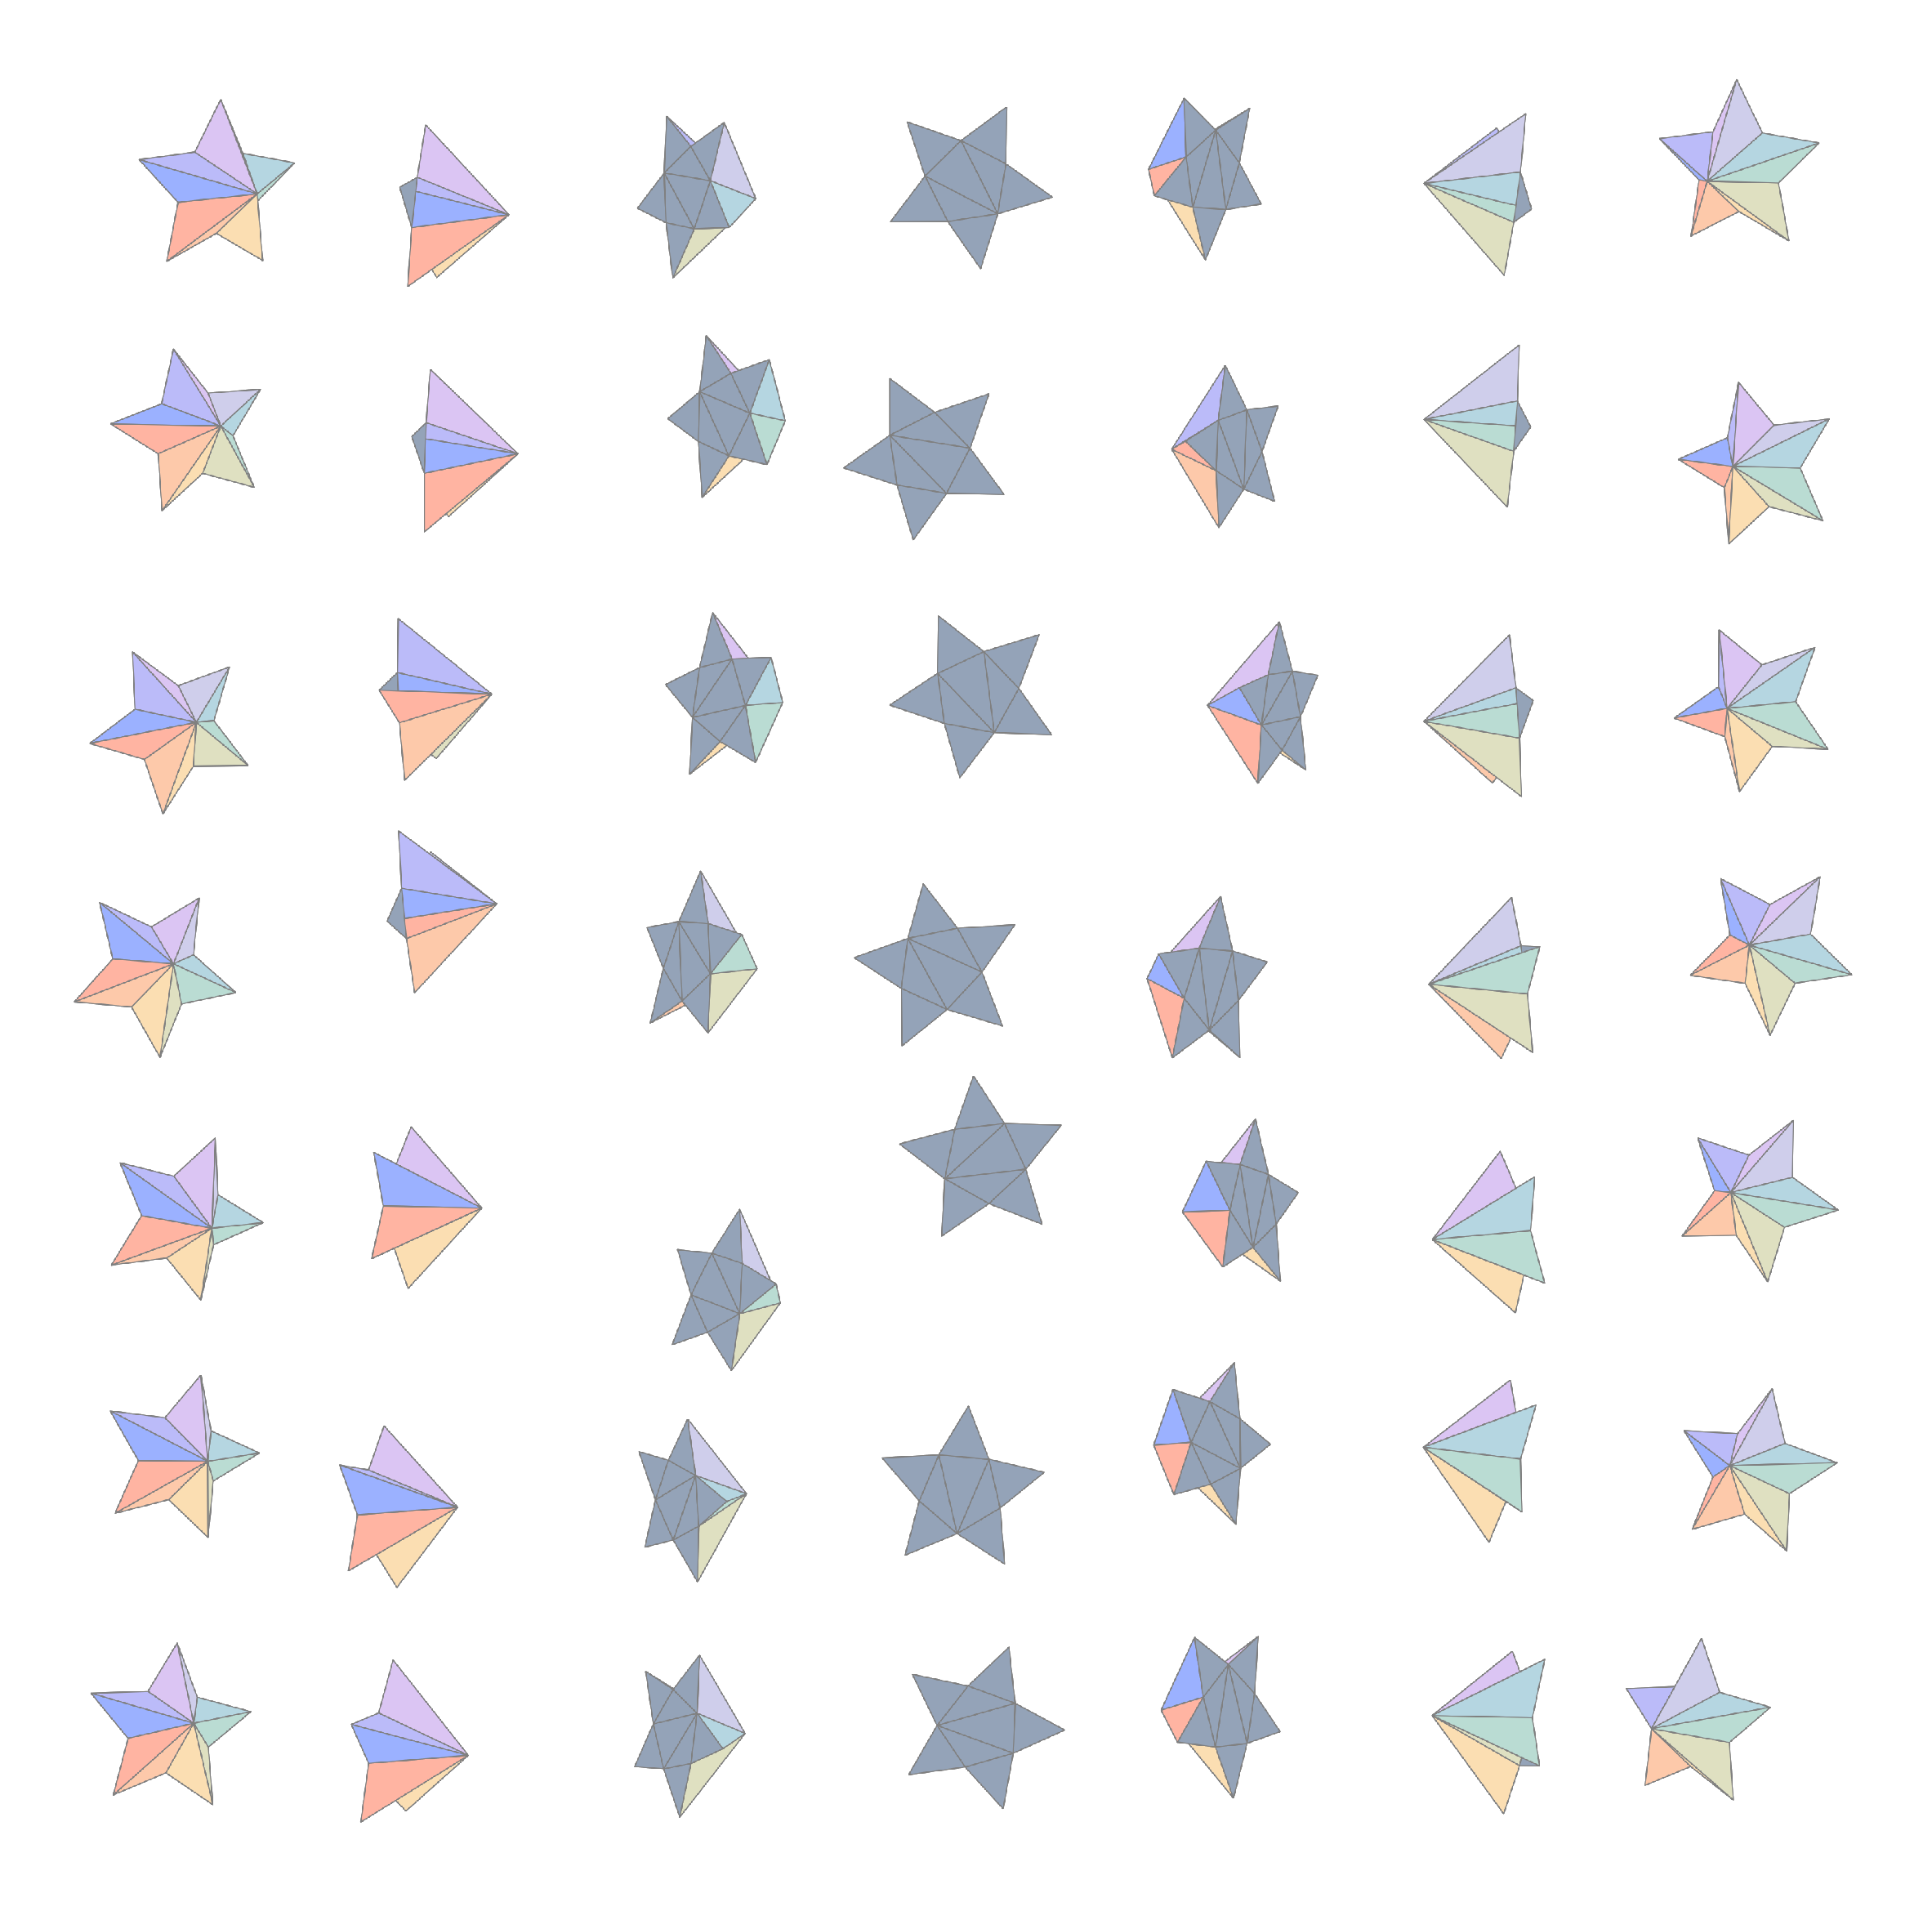

In [25]:
#SHOW PATCHES USING GLOBAL COORDINATE ASSIGNMENT (MESHES)

eps = 0.15
eq_inds = np.abs(s2_cover.base_points[:,-1]) < eps

eq_data = s2_bundle.data[eq_inds]

eq_base_angles = np.arctan2(s2_cover.base_points[eq_inds,1], s2_cover.base_points[eq_inds,0]) % (2*np.pi)

#Get visualization using meshes
coords = np.array([eq_base_angles, s2_triv_result.F[eq_inds]]).T
file_name = 'Star mesh torus.pdf'
save_path = folder_path + file_name
save_path = None
fig = cb.lattice_vis(mesh_data[eq_inds], coords, mesh_vis, 
                             per_row=7,
                              per_col = 7,
                             figsize=15, save_path = save_path)
plt.show()


In [ ]:
#SHOW PATCHES USING GLOBAL COORDINATE ASSIGNMENT (DENSITIES)
eps = 0.15
eq_inds = np.abs(s2_cover.base_points[:,-1]) < eps

eq_data = data[eq_inds]

eq_base_angles = np.arctan2(s2_cover.base_points[eq_inds,1], s2_cover.base_points[eq_inds,0]) % (2*np.pi)

#Get visualization using meshes
coords = np.array([eq_base_angles, s2_triv_result.F[eq_inds]]).T
file_name = 'Star density torus.pdf'
save_path = folder_path + file_name
save_path = None
fig = lattice_vis(eq_data, coords, vis_func, 
                             per_row=7,  
                              per_col = 7,
                             figsize=14, save_path = save_path)

plt.show()
